Задача:

В дейтинговом приложении тестируется гипотеза:

Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.

Проверьте:

Был ли эксперимент успешен в целом.
Проанализируйте, имеет ли нововведение смысл среди каких-либо конкретных групп пользователей.

In [1]:
import pandas as pd
import numpy as np
import pylab

from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import *

from scipy import stats
from scipy.stats import norm
import scipy.stats as ss
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
users_control_1 = pd.read_csv(
    r'C:\Users\User\Desktop\Карпов_курсы\Итоговый_проект\Вариант_3\Проект_3_users_control_1.csv',
    sep=';')

In [3]:
users_control_1.head(2)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0


In [4]:
users_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4340 non-null   int64  
 1   age               4340 non-null   int64  
 2   attraction_coeff  4340 non-null   int64  
 3   coins             60 non-null     float64
 4   country           4340 non-null   object 
 5   visit_days        3016 non-null   object 
 6   gender            4340 non-null   int64  
 7   age_filter_start  4340 non-null   int64  
 8   age_filter_end    4340 non-null   int64  
 9   views_count       4340 non-null   int64  
 10  was_premium       436 non-null    float64
 11  is_premium        192 non-null    float64
 12  total_revenue     4340 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 440.9+ KB


In [5]:
users_control_2 = pd.read_csv(
    r'C:\Users\User\Desktop\Карпов_курсы\Итоговый_проект\Вариант_3\Проект_3_users_control_2.csv',
    sep=';')

In [6]:
users_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4264 non-null   int64  
 1   age               4264 non-null   int64  
 2   attraction_coeff  4264 non-null   int64  
 3   coins             61 non-null     float64
 4   country           4264 non-null   object 
 5   visit_days        2900 non-null   object 
 6   gender            4264 non-null   int64  
 7   age_filter_start  4264 non-null   int64  
 8   age_filter_end    4264 non-null   int64  
 9   views_count       4264 non-null   int64  
 10  was_premium       411 non-null    float64
 11  is_premium        191 non-null    float64
 12  total_revenue     4264 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 433.2+ KB


In [7]:
users_test = pd.read_csv(
    r'C:\Users\User\Desktop\Карпов_курсы\Итоговый_проект\Вариант_3\Проект_3_users_test.csv',
    sep=';')

In [8]:
users_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4308 non-null   int64  
 1   age               4308 non-null   int64  
 2   attraction_coeff  4308 non-null   int64  
 3   coins             49 non-null     float64
 4   country           4308 non-null   object 
 5   visit_days        2978 non-null   object 
 6   gender            4308 non-null   int64  
 7   age_filter_start  4308 non-null   int64  
 8   age_filter_end    4308 non-null   int64  
 9   views_count       4308 non-null   int64  
 10  was_premium       408 non-null    float64
 11  is_premium        157 non-null    float64
 12  total_revenue     4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


In [9]:
transactions_control_1 = pd.read_csv(
    r'C:\Users\User\Desktop\Карпов_курсы\Итоговый_проект\Вариант_3\Проект_3_transactions_control_1.csv',
    sep=';', 
    parse_dates=['joined_at','paid_at'])

In [10]:
transactions_control_1.head(2)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium


In [11]:
transactions_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           377 non-null    float64       
 1   country       377 non-null    object        
 2   joined_at     377 non-null    datetime64[ns]
 3   paid_at       377 non-null    datetime64[ns]
 4   revenue       377 non-null    float64       
 5   payment_id    377 non-null    float64       
 6   from_page     377 non-null    object        
 7   product_type  377 non-null    object        
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 63.1+ KB


In [ ]:
# видим что считалось много пустых сторк. Удалим их из датафрэйма

In [12]:
transactions_control_1 = transactions_control_1[transactions_control_1.uid.notnull()]

In [13]:
transactions_control_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           377 non-null    float64       
 1   country       377 non-null    object        
 2   joined_at     377 non-null    datetime64[ns]
 3   paid_at       377 non-null    datetime64[ns]
 4   revenue       377 non-null    float64       
 5   payment_id    377 non-null    float64       
 6   from_page     377 non-null    object        
 7   product_type  377 non-null    object        
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 26.5+ KB


In [14]:
transactions_control_2 = pd.read_csv(
    r'C:\Users\User\Desktop\Карпов_курсы\Итоговый_проект\Вариант_3\Проект_3_transactions_control_2.csv',
    sep=';', 
    parse_dates=['joined_at','paid_at'])

In [15]:
transactions_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           328 non-null    int64         
 1   country       328 non-null    object        
 2   joined_at     328 non-null    datetime64[ns]
 3   paid_at       328 non-null    datetime64[ns]
 4   revenue       328 non-null    int64         
 5   payment_id    328 non-null    int64         
 6   from_page     328 non-null    object        
 7   product_type  328 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 20.6+ KB


In [16]:
transactions_test = pd.read_csv(
    r'C:\Users\User\Desktop\Карпов_курсы\Итоговый_проект\Вариант_3\Проект_3_transactions_test.csv', 
    sep=';', 
    parse_dates=['joined_at','paid_at'])

In [17]:
transactions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           273 non-null    int64         
 1   country       273 non-null    object        
 2   joined_at     273 non-null    datetime64[ns]
 3   paid_at       273 non-null    datetime64[ns]
 4   revenue       273 non-null    int64         
 5   payment_id    273 non-null    int64         
 6   from_page     273 non-null    object        
 7   product_type  273 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 17.2+ KB


In [ ]:
# определим по данным о транзакциях сроки проведения теста

In [18]:
transactions_test[['joined_at','paid_at']].describe(datetime_is_numeric=True)

,joined_at,paid_at
count,273,273
mean,2017-09-05 09:39:38.021978112,2017-09-05 17:54:49.230770176
min,2017-01-11 03:07:00,2017-01-11 04:37:00
25%,2017-08-11 03:54:00,2017-07-11 21:21:00
50%,2017-10-18 19:20:00,2017-10-22 16:23:00
75%,2017-10-23 08:21:00,2017-10-29 05:50:00
max,2017-10-31 23:40:00,2017-12-11 22:06:00


In [19]:
transactions_control_1[['joined_at','paid_at']].describe(datetime_is_numeric=True)

,joined_at,paid_at
count,377,377
mean,2017-08-22 02:04:00.636606464,2017-09-05 07:39:33.262598656
min,2015-01-19 11:49:00,2016-12-14 16:16:00
25%,2017-06-11 17:23:00,2017-07-11 12:47:00
50%,2017-10-16 22:33:00,2017-10-17 00:40:00
75%,2017-10-22 22:07:00,2017-10-28 03:14:00
max,2017-10-31 22:17:00,2017-12-11 21:57:00


In [20]:
transactions_control_2[['joined_at','paid_at']].describe(datetime_is_numeric=True)

,joined_at,paid_at
count,328,328
mean,2017-09-19 07:38:22.500000512,2017-09-04 16:16:01.463415296
min,2017-01-11 08:36:00,2017-01-11 05:34:00
25%,2017-10-13 09:36:45,2017-07-11 13:26:30
50%,2017-10-20 14:49:00,2017-10-22 00:15:00
75%,2017-10-26 01:40:00,2017-10-28 13:35:00
max,2017-10-31 17:43:00,2017-12-11 23:28:00


In [ ]:
#  видим что тест проходил с 11.01.2017 по 11.12.2017
# по условиям в тесте участвовали только новые юзеры
# в первой группе контроля есть транзакции, которые были произведены ранее

In [21]:
transactions_control_1.query('joined_at < "2017-01-11"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
65,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,refund_VP,other_type
101,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637.0,0.0,refung_AP,other_type
224,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143.0,0.0,refund_WP,other_type


In [22]:
transactions_control_1.query('paid_at < "2017-01-11"')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
65,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,refund_VP,other_type
101,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637.0,0.0,refung_AP,other_type
224,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143.0,0.0,refund_WP,other_type


In [23]:
transactions_control_1.query('uid == 960936960')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
65,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,refund_VP,other_type
101,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637.0,0.0,refung_AP,other_type
224,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143.0,0.0,refund_WP,other_type


In [ ]:
# видим что в первую контрольную группу попал один юзер, который не подходит под условия нашего теста
# удалим данные о нём и его транзакциях

In [24]:
transactions_control_1 = transactions_control_1.query('uid != 960936960')

In [25]:
users_control_1 = users_control_1.query('uid != 960936960')

In [ ]:
# проверим пересечение юзеров в выборках

In [26]:
uid_test = users_test.uid.unique()

In [27]:
uid_control_1 = users_control_1.uid.unique()

In [28]:
uid_control_2 = users_control_2.uid.unique()

In [29]:
np.intersect1d(uid_test, uid_control_1)

array([], dtype=int64)

In [30]:
np.intersect1d(uid_test, uid_control_2)

array([], dtype=int64)

In [31]:
np.intersect1d(uid_control_1, uid_control_2)

array([], dtype=int64)

In [580]:
# как видно пересечений в группах нет

In [ ]:
# проверим пересечение юзеров в данных о транзакциях

In [32]:
uid_test_tr = transactions_test.uid.unique()

In [33]:
uid_control_1_tr = transactions_control_1.uid.unique()

In [34]:
uid_control_2_tr = transactions_control_2.uid.unique()

In [35]:
np.intersect1d(uid_test_tr, uid_control_1_tr)

array([], dtype=float64)

In [36]:
np.intersect1d(uid_test_tr, uid_control_2_tr)

array([], dtype=int64)

In [37]:
np.intersect1d(uid_control_1_tr, uid_control_2_tr)

array([], dtype=float64)

In [ ]:
# как видно пересечений в группах нет

In [ ]:
# сопоставим данные о юзерах и суммах транзакций внутри групп

In [38]:
# количество юзеров, которые производили транзакции в тестовой группе
len(uid_test_tr)

146

In [39]:
# сумма выручки юзеров, данные которых не присутствуют в таблице транзакций
users_test.query('uid not in @uid_test_tr').total_revenue.sum()

0

In [40]:
# разница в суммарной выручке по таблице транзакций и траблице юзерс
transactions_test.revenue.sum() - users_test.query('uid in @uid_test_tr').total_revenue.sum()

44083

In [624]:
# видим что наши итоговые суммы не совпадают, определим такие расхождения по каждому юзеру

In [41]:
for id in uid_test_tr:
    if transactions_test.query('uid == @id').revenue.sum() - users_test.query('uid == @id').total_revenue.sum() != 0:
        print(id)

892275462


In [ ]:
# мы выявили id по которому не совпадает выручка

In [42]:
# проверим все транзакции этого пользователя
transactions_test.query('uid == 892275462')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
64,892275462,France,2017-10-17 05:56:00,2017-02-11 18:24:00,44083,19,coins_popup,other_type
154,892275462,France,2017-10-17 05:56:00,2017-10-20 17:00:00,14885,68,super_popup,other_type


In [43]:
users_test.query('uid == 892275462')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
2070,892275462,31,310,NaN,France,"1,2,3,4,5,9,13,15,16",1,36,68,58,1.0,1.0,14885


In [ ]:
# видим что есть одна транзакция, которая не отображена в таблице о юзерах
# возможно, это баг или данная транзакция была отменена
# исключим данную транзакцию

In [44]:
transactions_test = transactions_test.drop(index=(64))

In [45]:
transactions_test.revenue.sum() - users_test.query('uid in @uid_test_tr').total_revenue.sum()

0

In [46]:
# количество юзеров, которые производили транзакции в первой контрольной группе
len(uid_control_1_tr)

192

In [47]:
# сумма выручки юзеров, данные которых не присутствуют в таблице транзакций
users_control_1.query('uid not in @uid_control_1_tr').total_revenue.sum()

0

In [48]:
# разница в суммарной выручке по таблице транзакций и траблице юзерс
transactions_control_1.revenue.sum() - users_control_1.query('uid in @uid_control_1_tr').total_revenue.sum()

30264.0

In [49]:
# видим что наши итоговые суммы не совпадают, определим такие расхождения по каждому юзеру

In [50]:
for id in uid_control_1_tr:
    if transactions_control_1.query('uid == @id').revenue.sum() - users_control_1.query('uid == @id').total_revenue.sum() != 0:
        print(id)

892355163.0


In [ ]:
# мы выявили id по которому не совпадает выручка

In [51]:
# проверим все транзакции этого пользователя
transactions_control_1.query('uid == 892355163')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
303,892355163.0,United States of America,2017-10-15 18:45:00,2017-10-16 09:52:00,30264.0,68.0,super_popup,other_type


In [52]:
users_control_1.query('uid == 892355163')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
3370,892355163,40,640,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,25,60,700,1.0,NaN,0


In [582]:
# видим что есть одна транзакция, которая не отображена в таблице о юзерах
# возможно, это баг или данная транзакция была отменена
# исключим данную транзакцию

In [53]:
transactions_control_1 = transactions_control_1.drop(index=(303))

In [54]:
transactions_control_1.revenue.sum() - users_control_1.query('uid in @uid_control_1_tr').total_revenue.sum()

0.0

In [55]:
# количество юзеров, которые производили транзакции во второй контрольной группе
len(uid_control_2_tr)

187

In [56]:
# сумма выручки юзеров, данные которых не присутствуют в таблице транзакций
users_control_2.query('uid not in @uid_control_2_tr').total_revenue.sum()

0

In [57]:
# разница в суммарной выручке по таблице транзакций и траблице юзерс
transactions_control_2.revenue.sum() - users_control_2.query('uid in @uid_control_2_tr').total_revenue.sum()

0

In [ ]:
# Проведем A/A тесты, чтобы понять насколько качественно проведено сплитование 
# и нет ли выбросов и других багов в наших данных

In [ ]:
# сперва сравним данные о пользователях

In [61]:
data_a_a_users_control_1 = users_control_1\
                    .loc[:,['uid', 'age', 'country', 'gender', 'total_revenue']]\
                    .assign(group='control_1')

In [62]:
data_a_a_users_control_2 = users_control_2\
                                .loc[:,['uid', 'age', 'country', 'gender', 'total_revenue']]\
                                .assign(group='control_2')

In [64]:
data_a_a_users = pd.concat([data_a_a_users_control_1, data_a_a_users_control_2], ignore_index=True)

In [65]:
data_a_a_users.value_counts('group')

group
control_1    4339
control_2    4264
dtype: int64

<AxesSubplot:xlabel='group', ylabel='total_revenue'>

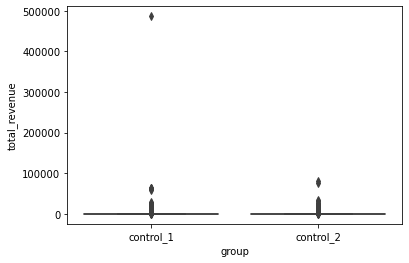

In [66]:
# построим boxplot , чтобы увидеть выбросы в наших данных
sns.boxplot(data=data_a_a_users,
           y='total_revenue',
           x='group')

In [ ]:
# видим что в первой группе присутсвует существенный выброс, проверим с чем он связан

In [67]:
data_a_a_users.query('total_revenue > 100000')

,uid,age,country,gender,total_revenue,group
1426,892333905,22,Italy,1,486330,control_1


In [ ]:
# выброс связан с активностью всего 1 пользователя из первой контрольной группы, проверим его транзакции

In [68]:
transactions_control_1.query('uid == 892333905').sort_values('paid_at')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
49,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:42:00,3783.0,67.0,menu,other_type
13,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783.0,67.0,menu,other_type
47,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783.0,67.0,menu,other_type
169,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783.0,67.0,menu,other_type
28,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:57:00,3783.0,67.0,empty_admins,other_type
296,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:57:00,3783.0,67.0,empty_admins,other_type
43,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783.0,67.0,empty_admins,other_type
198,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783.0,67.0,empty_admins,other_type
88,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783.0,67.0,empty_admins,other_type
6,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 02:08:00,12610.0,19.0,gifts,coins


In [ ]:
# видим что было совершено большое количество транзакции в короткий временной промежуток
# имеет мсысл предроложить, что это активность бота или баг
# исключим данные об этом пользоветеле

In [69]:
users_control_1 = users_control_1.query('uid != 892333905.0')

In [70]:
transactions_control_1 = transactions_control_1.query('uid != 892333905.0')

In [72]:
data_a_a_users = data_a_a_users.query('uid != 892333905.0')

In [ ]:
# Проведем симуляцию A/A тестов и посчитаем FPR

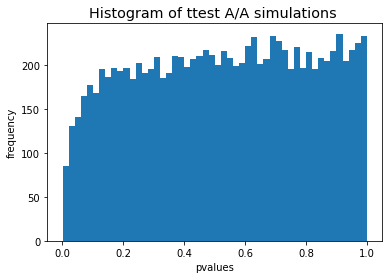

0.0295

In [73]:
simulations = 10000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = data_a_a_users[data_a_a_users.group == 'control_1'].total_revenue.sample(n_s, replace = False).values
    s2 = data_a_a_users[data_a_a_users.group == 'control_2'].total_revenue.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

Мы видим что распределение близко к равномерному и индекс FPR меньше заданного уровня. Следовательно данные в наших контрльных группах схожи

In [ ]:
# сравним данные о транзакциях пользователях

In [74]:
data_a_a_tr_control_1 = users_control_1\
                    .loc[:,['uid', 'age', 'country', 'gender']]\
                    .assign(group='control_1')\
                    .merge(transactions_control_1, on='uid')

In [75]:
ata_a_a_tr_control_2 = users_control_2\
                    .loc[:,['uid', 'age', 'country', 'gender']]\
                    .assign(group='control_2')\
                    .merge(transactions_control_2, on='uid')

In [76]:
data_a_a_tr = pd.concat([data_a_a_tr_control_1, ata_a_a_tr_control_2], ignore_index=True)

In [77]:
data_a_a_tr.value_counts('group')

group
control_1    346
control_2    328
dtype: int64

<AxesSubplot:xlabel='group', ylabel='revenue'>

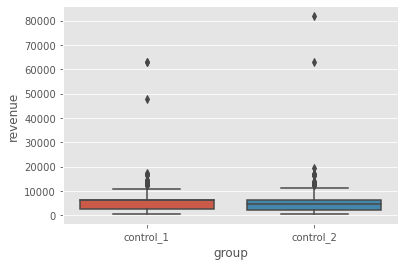

In [78]:
# построим boxplot чтобы увидеть есть ли ещё выбросы
sns.boxplot(data=data_a_a_tr,
           y='revenue',
           x='group')

In [ ]:
# в обеих группах есть выбросы, проверим их

In [79]:
data_a_a_tr.query('revenue > 40000')

,uid,age,country_x,gender,group,country_y,joined_at,paid_at,revenue,payment_id,from_page,product_type
19,892421277,22,United States of America,1,control_1,United States of America,2017-10-14 13:05:00,2017-10-15 13:11:00,47723.0,147.0,promo_09,premium_no_trial
51,891383310,22,Turkey,1,control_1,Turkey,2017-04-11 20:47:00,2017-04-11 22:17:00,63037.0,147.0,autoreply_message,premium_no_trial
174,892216461,19,United States of America,1,control_1,United States of America,2017-10-18 14:41:00,2017-10-18 15:02:00,63037.0,147.0,autoreply_message,premium_no_trial
465,892307238,29,Spain,1,control_2,Spain,2017-10-16 16:01:00,2017-10-16 20:41:00,63037.0,147.0,left_sidebar_menu,premium_no_trial
479,891778551,30,United Arab Emirates,1,control_2,United Arab Emirates,2017-10-27 21:26:00,2017-10-27 22:30:00,81796.0,147.0,left_sidebar_menu,premium_no_trial


In [80]:
transactions_control_1.query('uid == 892421277')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
30,892421277.0,United States of America,2017-10-14 13:05:00,2017-10-15 13:11:00,47723.0,147.0,promo_09,premium_no_trial
100,892421277.0,United States of America,2017-10-14 13:05:00,2017-02-11 02:12:00,12610.0,19.0,empty_likes,coins


In [81]:
transactions_control_1.query('uid == 891383310')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
317,891383310.0,Turkey,2017-04-11 20:47:00,2017-04-11 22:17:00,63037.0,147.0,autoreply_message,premium_no_trial


In [82]:
transactions_control_1.query('uid == 892216461')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
175,892216461.0,United States of America,2017-10-18 14:41:00,2017-10-18 16:05:00,1261.0,19.0,empty_likes,coins
277,892216461.0,United States of America,2017-10-18 14:41:00,2017-10-18 15:02:00,63037.0,147.0,autoreply_message,premium_no_trial


In [83]:
transactions_control_2.query('uid == 892307238')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
22,892307238,Spain,2017-10-16 16:01:00,2017-10-16 20:41:00,63037,147,left_sidebar_menu,premium_no_trial
87,892307238,Spain,2017-10-16 16:01:00,2017-10-16 20:42:00,12610,19,menu,coins


In [84]:
transactions_control_2.query('uid == 891778551')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
47,891778551,United Arab Emirates,2017-10-27 21:26:00,2017-10-27 22:30:00,81796,147,left_sidebar_menu,premium_no_trial


In [ ]:
# как видно выбросы связаны либо с единичными транзакциями пользователей
# либо пользователь делал транзакции с разные временные периоды
# таким образом мы не можем предпологать, что данные выбросы не являются реальными транзакциями пользователей

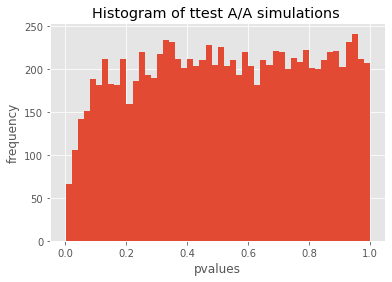

0.0225

In [85]:
simulations = 10000
n_s = 100
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = data_a_a_tr[data_a_a_tr.group == 'control_1'].revenue.sample(n_s, replace = False).values
    s2 = data_a_a_tr[data_a_a_tr.group == 'control_2'].revenue.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

Мы видим что распределение близко к равномерному и индекс FPR меньше заданного уровня. Следовательно данные в наших контрльных группах схожи

Для сравнения групп будем использовать такие метрики как:
 - ARPU (посчитав его на основании данных о всех пользователях) и средний чек (посчитв его на основании транзакций)
 - доля транзакций типа "premium_no_trial" и конверсия данного типа продукта в повторную покупку 

Первые две метрики дадут нам общее понимание об результатах нашего теста
Вторые дадут нам понимание о наших рисках

In [86]:
users_control_1['group'] = 'control_1'

In [87]:
users_control_2['group'] = 'control_2'

In [88]:
users_test['group'] = 'test'

In [89]:
all_data_users = pd.concat([users_control_1, users_control_2, users_test], ignore_index=False)

In [ ]:
# проверим наши данные на то как они сбалансированы по качественным признакам

In [90]:
pd.DataFrame(all_data_users.groupby('group')\
             .gender.value_counts(normalize=True))\
             .unstack(level=1)

gender          
gender            0         1
group                        
control_1  0.041955  0.958045
control_2  0.045732  0.954268
test       0.046890  0.953110

In [ ]:
# как видно группы сбалансированы по полу
# но стоит обратить внимание, что в наших выборках само соотношение полов нарушено
# юолее 95% выборок это пользователи с gender=1

In [91]:
pd.DataFrame(all_data_users.groupby('group')\
             .country.value_counts(normalize=True))\
             .unstack(level=1)

country                                                     \
country     Algeria Argentina   Armenia Australia   Austria Azerbaijan   
group                                                                    
control_1  0.000461  0.089673  0.000231  0.011526       NaN        NaN   
control_2       NaN  0.093105       NaN  0.011961  0.000469        NaN   
test       0.000464  0.091922       NaN  0.014392       NaN   0.000232   

                                                   ...                      \
country     Belarus   Belgium   Bolivia    Brazil  ...   Tunisia    Turkey   
group                                              ...                       
control_1       NaN  0.024896       NaN       NaN  ...  0.000692  0.001844   
control_2  0.000235  0.021107       NaN       NaN  ...       NaN  0.001173   
test            NaN  0.021356  0.000232  0.000232  ...  0.000696  0.001161   

                                                    \
country      Uganda   Ukraine United Arab Emirates   
group                                                
control_1       NaN  0.001844             0.047718   
control_2  0.000235  0.004221             0.049484   
test            NaN  0.003482             0.052461   

                                                                             \
country   United Kingdom (Great Britain) United States of America   Uruguay   
group                                                                         
control_1                       0.033656                 0.339096       NaN   
control_2                       0.034240                 0.348499  0.000235   
test                            0.039229                 0.336583  0.000232   

                                
country   Uzbekistan Venezuela  
group                           
control_1        NaN  0.000461  
control_2        NaN       NaN  
test        0.000232       NaN  

[3 rows x 72 columns]

In [ ]:
# наши группы сбалансированы по региональному признаку

In [92]:
all_data_users.age.quantile([0.25, 0.5, 0.75])

0.25    25.0
0.50    30.0
0.75    38.0
Name: age, dtype: float64

In [93]:
def age_group(x):
    if x < 25:
        return 1
    elif x < 30 and x >= 25:
        return 2
    elif x < 38 and x >= 30:
        return 3
    else:
        return 4
all_data_users['age_group'] = all_data_users.age.apply(age_group)

In [94]:
pd.DataFrame(all_data_users.groupby('group').age_group.value_counts(normalize=True)).unstack(level=0)

age_group                    
group     control_1 control_2      test
age_group                              
1          0.251268  0.247889  0.247679
2          0.224527  0.232176  0.244429
3          0.251037  0.252580  0.248143
4          0.273167  0.267355  0.259749

In [ ]:
# наши группы сбалансированы по возростному признаку

In [95]:
# посчитаем ARPU по группам
all_data_users.groupby('group').agg({'total_revenue': 'mean'})

,total_revenue
group,
control_1,482.920931
control_2,450.384146
test,534.080316


In [ ]:
#  как видно точечная оценка метрики в тестовой группе выше
# проверим это с помощью статистического теста

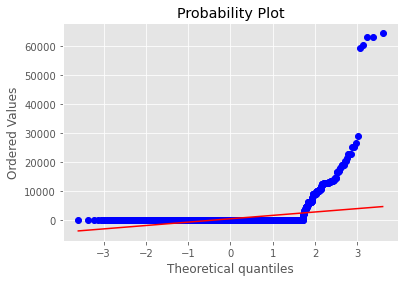

In [96]:
# построим qqplot для того чтобы визуально оценить нормальность нашего распределения
stats.probplot(all_data_users.query('group == "control_1"').total_revenue, dist='norm', plot=pylab)
pylab.show()

In [ ]:
# как видно наше распределение сильно отличается от нормального
# очень много значений лежит в нуле и есть выбросы
# скорее всего наше рспределение имеет экспоненциальный вид
# но в любом случае проверим гипотизу о нормальности распределения с помощью стат теста

In [97]:
ss.normaltest(all_data_users.query('group == "control_1"').total_revenue)

NormaltestResult(statistic=7444.266297309236, pvalue=0.0)

In [ ]:
# p-value меньше 0.05 соотвествнно мы отвергаем гипотизу, что наше распределение имеет нормальный вид

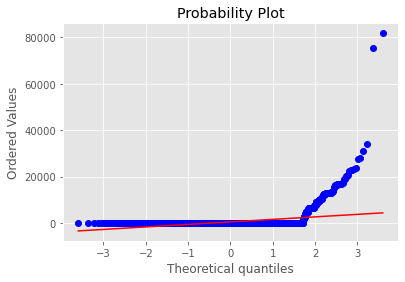

In [98]:
# построим qqplot для того чтобы визуально оценить нормальность нашего распределения
stats.probplot(all_data_users.query('group == "control_2"').total_revenue, dist='norm', plot=pylab)
pylab.show()

In [ ]:
# как видно наше распределение сильно отличается от нормального
# очень много значений лежит в нуле и есть выбросы
# скорее всего наше рспределение имеет экспоненциальный вид
# но в любом случае проверим гипотизу о нормальности распределения с помощью стат теста

In [99]:
ss.normaltest(all_data_users.query('group == "control_2"').total_revenue)

NormaltestResult(statistic=7811.263351276203, pvalue=0.0)

In [ ]:
# p-value меньше 0.05 соотвествнно мы отвергаем гипотизу, что наше распределение имеет нормальный вид

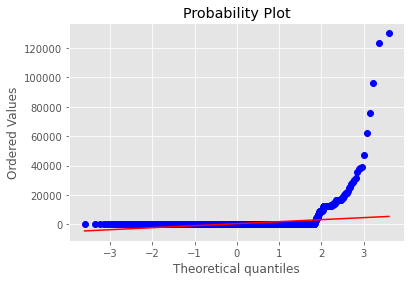

In [100]:
# построим qqplot для того чтобы визуально оценить нормальность нашего распределения
stats.probplot(all_data_users.query('group == "test"').total_revenue, dist='norm', plot=pylab)
pylab.show()

In [ ]:
# как видно наше распределение сильно отличается от нормального
# очень много значений лежит в нуле и есть выбросы
# скорее всего наше рспределение имеет экспоненциальный вид
# но в любом случае проверим гипотизу о нормальности распределения с помощью стат теста

In [101]:
ss.normaltest(all_data_users.query('group == "test"').total_revenue)

NormaltestResult(statistic=8916.392317282456, pvalue=0.0)

In [ ]:
# p-value меньше 0.05 соотвествнно мы отвергаем гипотизу, что наше распределение имеет нормальный вид

In [ ]:
# так как наши данные имеют не нормальное распределение и имеют выбросы, хотя и нвши выборки достаточно большого размера
# мы будем использовать непараметрический тест Мана-Уитни

In [102]:
mannwhitneyu(all_data_users.query('group == "test"').total_revenue, 
             all_data_users.query('group == "control_1"').total_revenue)

MannwhitneyuResult(statistic=9254731.5, pvalue=0.010759107826516442)

In [103]:
mannwhitneyu(all_data_users.query('group == "test"').total_revenue, 
             all_data_users.query('group == "control_2"').total_revenue)

MannwhitneyuResult(statistic=9096934.5, pvalue=0.011088105649639897)

In [ ]:
# ARPU в обеих контрольных группах статистически отличается от тестового

In [ ]:
# проверим гипотизу о различиях в величине среднего чека

In [104]:
all_data_test = (transactions_test
                 .merge(users_test.loc[:,['uid', 'age', 'attraction_coeff', 'gender', 'views_count']],
                                        how='left', on='uid')
                )
all_data_test['group'] = 'test'

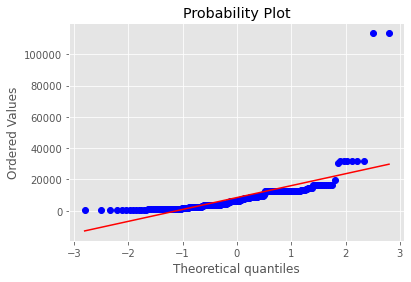

In [105]:
# построим qqplot для того чтобы визуально оценить нормальность нашего распределения
stats.probplot(all_data_test.revenue, dist='norm', plot=pylab)
pylab.show()

In [ ]:
# как видно у нашего распределения есть отличия от номального
# много значений близких к нулю и есть выбросы
# возможно наше распределение имеет log-нормальный вид
# но в любом случае проверим гипотизу о нормальности распределения с помощью стат теста

In [106]:
print(ss.normaltest(all_data_test.revenue))

NormaltestResult(statistic=385.237454837701, pvalue=2.222028222760863e-84)


In [107]:
print(ss.normaltest(np.log(all_data_test.revenue)))

NormaltestResult(statistic=6.218645427265555, pvalue=0.04463117319120573)


In [ ]:
# как видно из тестов наши данные имеют ненормальное распределение

In [108]:
all_data_contriol_1 = (transactions_control_1
                       .merge(users_control_1.loc[:,['uid', 'age', 'attraction_coeff', 'gender', 'views_count']],
                                                   how='left', on='uid')
                      .query('country != "United Kingdom (Great Britain)" & uid != 892333905')
                      )
all_data_contriol_1['group'] = 'control_1'

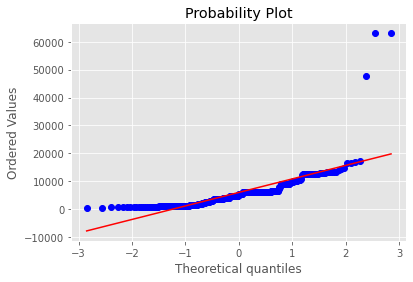

In [109]:
# построим qqplot для того чтобы визуально оценить нормальность нашего распределения
stats.probplot(all_data_contriol_1.revenue, dist='norm', plot=pylab)
pylab.show()

In [ ]:
# как видно у нашего распределения есть отличия от номального
# много значений близких к нулю и есть выбросы
# возможно наше распределение имеет log-нормальный вид
# но в любом случае проверим гипотизу о нормальности распределения с помощью стат теста

In [110]:
print(ss.normaltest(all_data_contriol_1.revenue))

NormaltestResult(statistic=383.72665472070935, pvalue=4.729504552023357e-84)


In [111]:
print(ss.normaltest(np.log(all_data_contriol_1.revenue)))

NormaltestResult(statistic=4.184795600496162, pvalue=0.12339091405474123)


In [ ]:
# как видно из тестов наши данные имеют нормальное распределение в логарифмированном виде

In [112]:
all_data_contriol_2 = (transactions_control_2
                       .merge(users_control_2.loc[:,['uid', 'age', 'attraction_coeff', 'gender', 'views_count']],
                              how='left', on='uid')
                      .query('country != "United Kingdom (Great Britain)" & uid != 892333905')
                      )
all_data_contriol_2['group'] = 'control_2'

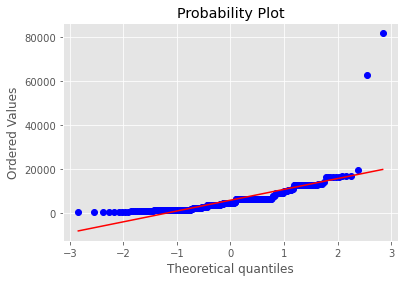

In [113]:
# построим qqplot для того чтобы визуально оценить нормальность нашего распределения
stats.probplot(all_data_contriol_2.revenue, dist='norm', plot=pylab)
pylab.show()

In [ ]:
# как видно у нашего распределения есть отличия от номального
# много значений близких к нулю и есть выбросы
# возможно наше распределение имеет log-нормальный вид
# но в любом случае проверим гипотизу о нормальности распределения с помощью стат теста

In [114]:
print(ss.normaltest(all_data_contriol_2.revenue))

NormaltestResult(statistic=431.1100912010253, pvalue=2.430150381740779e-94)


In [115]:
print(ss.normaltest(np.log(all_data_contriol_2.revenue)))

NormaltestResult(statistic=3.4939663254558155, pvalue=0.1742989827408031)


In [ ]:
# как видно из тестов наши данные имеют нормальное распределение в логарифмированном виде

In [ ]:
# так как наше тестовое рапределение не имеет нормального вида и все распределения имеют выбросы
# воспользуемся методом bootstrap для анализа медиан распределений

In [116]:
all_data = pd.concat([all_data_test, all_data_contriol_1, all_data_contriol_2], ignore_index=True)

In [117]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 2000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # median() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

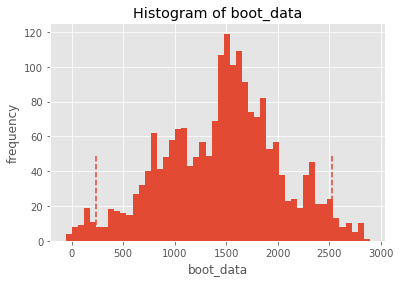

In [119]:
booted_data_median1 = get_bootstrap(
    all_data[all_data.group == 'test'].revenue,
    all_data[all_data.group == 'control_1'].revenue,
    statistic = np.median
    )

In [120]:
booted_data_median1["p_value"]

0.009858074694533248

In [121]:
booted_data_median1['ci']

,0
0.025,234.0
0.975,2522.0


In [ ]:
# как видно p-value меньше 0.05 и доверительный интервал распроложен выше нуля
# можно сделать вывод что медианные значения чеков в выборках статистически отличаются

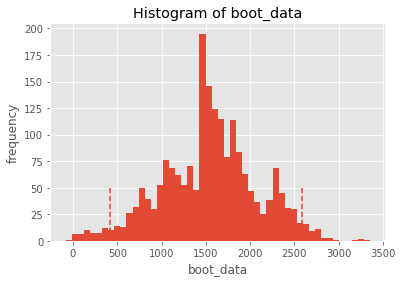

In [122]:
booted_data_median2 = get_bootstrap(
    all_data[all_data.group == 'test'].revenue,
    all_data[all_data.group == 'control_2'].revenue,
    statistic = np.median
    )

In [123]:
booted_data_median2["p_value"]

0.004266345392533408

In [124]:
booted_data_median2['ci']

,0
0.025,416.0
0.975,2587.0


In [ ]:
# как видно p-value меньше 0.05 и доверительный интервал распроложен выше нуля
# можно сделать вывод что медианные значения чеков в выборках статистически отличаются

In [ ]:
# с помощью метода bootstrap проверим отличаются ли доли продукта "premium_no_trial" в наших выборках

In [125]:
all_data['is_premium'] = all_data.product_type.apply(lambda x: 1 if x == 'premium_no_trial' else 0)

In [126]:
all_data.groupby('group').agg({'is_premium': 'mean'})

,is_premium
group,
control_1,0.316456
control_2,0.311688
test,0.279412


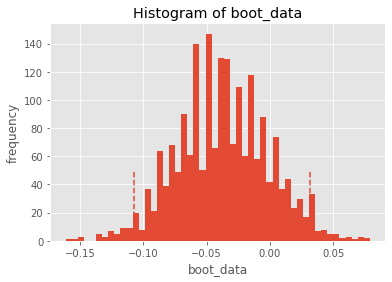

In [127]:
booted_data_conversion_to_premium1 = get_bootstrap(
    all_data[all_data.group == 'test'].is_premium,
    all_data[all_data.group == 'control_1'].is_premium
    )

In [128]:
booted_data_conversion_to_premium1["p_value"]

0.3066176827577737

In [129]:
booted_data_conversion_to_premium1['ci']

,0
0.025,-0.107595
0.975,0.031646


In [ ]:
# как видно p-value больше 0.05 и доверительный интервал захватывает нулевое значение
# таким образом нельзя сделать вывод что отличия статистически значимы и получены не случайно

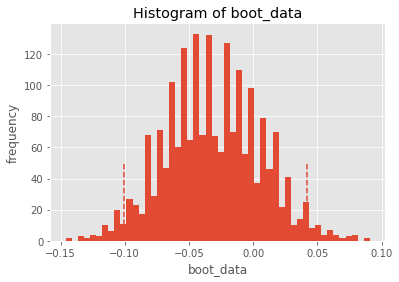

In [130]:
booted_data_conversion_to_premium2 = get_bootstrap(
    all_data[all_data.group == 'test'].is_premium,
    all_data[all_data.group == 'control_2'].is_premium
    )

In [131]:
booted_data_conversion_to_premium2["p_value"]

0.4025295932692564

In [132]:
booted_data_conversion_to_premium2['ci']

,0
0.025,-0.100731
0.975,0.042208


In [ ]:
# как видно p-value больше 0.05 и доверительный интервал захватывает нулевое значение
# таким образом нельзя сделать вывод что отличия статистически значимы и получены не случайно

In [ ]:
# проверим с помощью метода bootsrap различие в величине повторных покупок продукта "premium_no_trial"

In [133]:
aps_premium = all_data.query('is_premium == 1')\
                    .groupby(['group', 'uid'], as_index=False)\
                    .agg({'is_premium': 'sum'})\
                    .rename(columns={'is_premium': 'aps'})

In [134]:
aps_premium.groupby('group').agg({'aps': 'mean'})

,aps
group,
control_1,1.063830
control_2,1.032258
test,1.134328


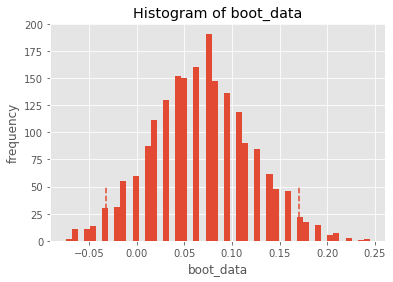

In [135]:
booted_data_aps_premium1= get_bootstrap(
    aps_premium[aps_premium.group == 'test'].aps,
    aps_premium[aps_premium.group == 'control_1'].aps
    )

In [136]:
booted_data_aps_premium1["p_value"]

0.18679963161990853

In [137]:
booted_data_aps_premium1['ci']

,0
0.025,-0.031915
0.975,0.170479


In [ ]:
# как видно p-value больше 0.05 и доверительный интервал захватывает нулевое значение
# таким образом нельзя сделать вывод что отличия статистически значимы и получены не случайно

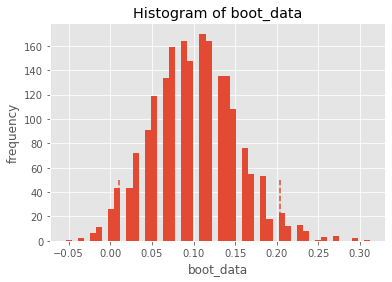

In [138]:
booted_data_aps_premium2= get_bootstrap(
    aps_premium[aps_premium.group == 'test'].aps,
    aps_premium[aps_premium.group == 'control_2'].aps
    )

In [139]:
booted_data_aps_premium2["p_value"]

0.04613029656825835

In [140]:
booted_data_aps_premium2['ci']

,0
0.025,0.010753
0.975,0.204301


In [ ]:
# как видно p-value меньше 0.05 и доверительный интервал незахватывает нулевое значение
# таким образом можно сделать вывод что различия статистически значимы

На основании проведенных тестов можно сделать вывод, что наш эксперимент был в целом удачным. Значения ARPU и величина медианного чека выросли по отношению к обоим контрольным группа.
Доля платежей продукта "premium_no_trial" статистически не изменилась, то есть пользователи не стали реже подписываться на premium.
Стоит обратить внимание, что величина повторных покупок тарифа premium в тестовой группе возросла. В сравнении с первой контрольной группой это изменение нельзя считать статистически значимым, а в сранение со второй можно.

In [ ]:
# проверим влияние отдельных признаков на результат.
# так как наш тест связан с премиум подпиской будем исследовать только данные транзакций с соотвествующим типом продукта
# как было выявлено ранее мы имеем значительный перикос по полу наших пользователей
# таким образом не имеет смысла исследовать этот признак

In [ ]:
# спрева проверим влияние такого факора как страна

In [141]:
transactions_test['group'] = 'test'

In [142]:
transactions_control_1['group'] = 'control_1'

In [143]:
transactions_control_2['group'] = 'control_2'

In [144]:
all_transactions = pd.concat([transactions_test, transactions_control_1, transactions_control_2]
                             , ignore_index=False)\
                    .query('product_type =="premium_no_trial"')

In [145]:
users_test['group'] = 'test'

In [146]:
users_control_1['group'] = 'control_1'

In [147]:
users_control_2['group'] = 'control_2'

In [148]:
all_users = pd.concat([users_test, users_control_1, users_control_2], ignore_index=False)

In [149]:
all_transactions = all_transactions.groupby(['group', 'uid'], as_index=False)\
                                .agg({'revenue': 'sum'})\
                                .merge(all_users.loc[:,['uid', 'age', 'country']], how='left', on='uid')

In [150]:
all_transactions.country.value_counts()

United States of America          76
France                            24
Italy                             23
Spain                             21
United Kingdom (Great Britain)    18
Argentina                         17
Chile                             14
Israel                            14
United Arab Emirates              13
Germany                            9
Canada                             8
Belgium                            7
Portugal                           6
Switzerland                        4
Turkey                             4
Australia                          3
India                              2
Ukraine                            1
Mexico                             1
Latvia                             1
Austria                            1
Name: country, dtype: int64

In [ ]:
# так как в наших выборках представлено много стран и по многим из них количество наблюдений достаточно мало
# сгруппируем данные по регионам

In [151]:
condlist_countrys = [
    (all_transactions.country.isin(['United States of America', 'Canada'])),
    (all_transactions.country.isin(['France', 'Italy', 'Spain','United Kingdom (Great Britain)',
                                    'Germany', 'Belgium', 'Portugal', 'Switzerland', 'Latvia',
                                    'Ukraine', 'Austria'])),
    (all_transactions.country.isin(['Argentina', 'Chile', 'Mexico'])),
    (all_transactions.country.isin(['Israel', 'United Arab Emirates', 'Turkey'])),
    (all_transactions.country.isin(['Australia'])),
    (all_transactions.country.isin(['India']))]

In [152]:
choicelist_countrys = ['North America',
                      'Europe',
                      'Latin America',
                      'Middle East',
                      'Asia',
                      'Australia']

In [153]:
all_transactions['region'] = np.select(condlist_countrys, choicelist_countrys)

In [154]:
all_transactions.groupby(['region', 'group']).revenue.describe()

count          mean           std      min       25%  \
region        group                                                             
Asia          control_1    1.0   3588.000000           NaN   3588.0   3588.00   
              control_2    1.0   9438.000000           NaN   9438.0   9438.00   
              test         1.0  12597.000000           NaN  12597.0  12597.00   
Australia     control_1    2.0   4810.000000    147.078210   4706.0   4758.00   
Europe        control_1   40.0   5897.125000   2266.965216   1898.0   4524.00   
              control_2   49.0   7212.081633   8464.008915   1482.0   4797.00   
              test        26.0  11938.500000  21118.460569   1898.0   5378.75   
Latin America control_1    9.0   6007.444444    580.157115   4745.0   6292.00   
              control_2   13.0   6529.000000   1829.963797   4732.0   5278.00   
              test        10.0  10471.500000   5666.062424   5330.0   6750.25   
Middle East   control_1   16.0   9100.812500  14414.227001   3432.0   5343.00   
              control_2    6.0  18646.333333  30941.802104   4914.0   6292.00   
              test         9.0  21418.222222  34799.965685   3614.0   8697.00   
North America control_1   30.0   8914.966667  12979.695035   1508.0   4537.00   
              control_2   33.0   5612.848485   1603.722800   2756.0   4537.00   
              test        21.0   9058.523810   2470.446814   4706.0   7774.00   

                             50%       75%       max  
region        group                                   
Asia          control_1   3588.0   3588.00    3588.0  
              control_2   9438.0   9438.00    9438.0  
              test       12597.0  12597.00   12597.0  
Australia     control_1   4810.0   4862.00    4914.0  
Europe        control_1   6292.0   6438.25   12844.0  
              control_2   6292.0   6409.00   63037.0  
              test        6844.5  11833.25  113477.0  
Latin America control_1   6292.0   6292.00    6292.0  
              control_2   6292.0   6292.00   10413.0  
              test        8216.0  12597.00   24531.0  
Middle East   control_1   5908.5   6292.00   63037.0  
              control_2   6292.0   6292.00   81796.0  
              test        9217.0  12597.00  113477.0  
North America control_1   6292.0   6292.00   63037.0  
              control_2   5265.0   6292.00    9360.0  
              test        9100.0  11115.00   12597.0

In [ ]:
#  из точечных оценок видно что средний и медианный чеки выросли во всех группах
# простроим график враимосвязи факторов

<AxesSubplot:xlabel='region', ylabel='revenue'>

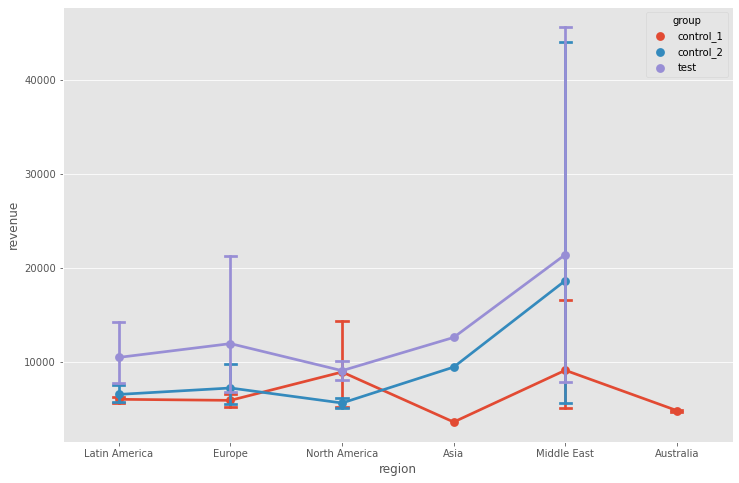

In [155]:
plt.figure(figsize=(12,8))
sns.pointplot(x='region', y='revenue', data=all_transactions, hue='group', capsize= .1)

In [ ]:
#  как видно из графика хотя средние величины в тестовой группе и выше
# но доверительные интервалы достаочно широкие и пересекаются
# поэтому проверим стат значимость этих изменений
# так как не во всех группах имеется достаточное количество наблюдений тесты проведем только для Европы и Северной Америки

In [156]:
print(mannwhitneyu(all_transactions.query('group == "test" &  region == "Europe"').revenue, 
             all_transactions.query('group == "control_1" & region == "Europe"').revenue))
print(mannwhitneyu(all_transactions.query('group == "test" &  region == "Europe"').revenue, 
             all_transactions.query('group == "control_2" & region == "Europe"').revenue))

MannwhitneyuResult(statistic=379.5, pvalue=0.032397898277440156)
MannwhitneyuResult(statistic=487.5, pvalue=0.04696354298884014)


In [157]:
print(mannwhitneyu(all_transactions.query('group == "test" &  region == "North America"').revenue, 
             all_transactions.query('group == "control_1" & region == "North America"').revenue))
print(mannwhitneyu(all_transactions.query('group == "test" &  region == "North America"').revenue, 
             all_transactions.query('group == "control_2" & region == "North America"').revenue))

MannwhitneyuResult(statistic=118.5, pvalue=7.544922007046259e-05)
MannwhitneyuResult(statistic=83.0, pvalue=1.2189922675104164e-06)


In [ ]:
# как видно из тестов изменения имеют стат значимость для обеих групп

In [ ]:
# проверим влияние такого факора как возраст

In [158]:
all_transactions.age.quantile([0.25, 0.5, 0.75])

0.25    24.0
0.50    29.0
0.75    36.5
Name: age, dtype: float64

In [ ]:
#  разделим пользователей на возростные группы

In [159]:
condlist_age = [
                (all_transactions.age < 25),
                (all_transactions.age >= 25) & (all_transactions.age < 35),
                (all_transactions.age >=35) & (all_transactions.age < 50),
                (all_transactions.age >=50)
]

In [160]:
choicelist_age = ['1', '2', '3', '4']

In [161]:
all_transactions['age_group'] = np.select(condlist_age, choicelist_age)

In [162]:
all_transactions.groupby(['age_group', 'group']).revenue.describe()

count          mean           std      min       25%  \
age_group group                                                             
1         control_1   28.0  11263.107143  16796.084348   1898.0   4306.25   
          control_2   30.0   6364.800000   1793.160423   3900.0   4865.25   
          test        18.0   8928.833333   4592.425276   3614.0   6292.00   
2         control_1   42.0   5761.476190   2091.088295   1898.0   4712.50   
          control_2   46.0   8378.500000  14104.042307   1482.0   4537.00   
          test        23.0  13711.043478  22030.493094   4537.0   6838.00   
3         control_1   21.0   5693.380952   1301.769890   1508.0   5512.00   
          control_2   22.0   6510.045455   2011.464060   4056.0   6292.00   
          test        23.0  12527.478261  22244.465865   1898.0   6285.50   
4         control_1    7.0   5616.000000   1420.890683   3042.0   5031.00   
          control_2    4.0   6308.250000     32.500000   6292.0   6292.00   
          test         3.0  15500.333333   5028.720845  12597.0  12597.00   

                         50%       75%       max  
age_group group                                   
1         control_1   6292.0   6844.50   63037.0  
          control_2   6292.0   6454.50   10608.0  
          test        8632.0   9187.75   24531.0  
2         control_1   6292.0   6292.00   12844.0  
          control_2   6292.0   6292.00   81796.0  
          test        8268.0  12597.00  113477.0  
3         control_1   6292.0   6292.00    6448.0  
          control_2   6292.0   6448.00   12688.0  
          test        7774.0  11856.00  113477.0  
4         control_1   6292.0   6292.00    7332.0  
          control_2   6292.0   6308.25    6357.0  
          test       12597.0  16952.00   21307.0

In [ ]:
# по точечным оценкам видно что в первой группе наше среднее значение в тестовой группе ниже чем в контроле
# но медианное значение выше
# для остальных групп как среднее так и медиана существенно отличаются

<AxesSubplot:xlabel='age_group', ylabel='revenue'>

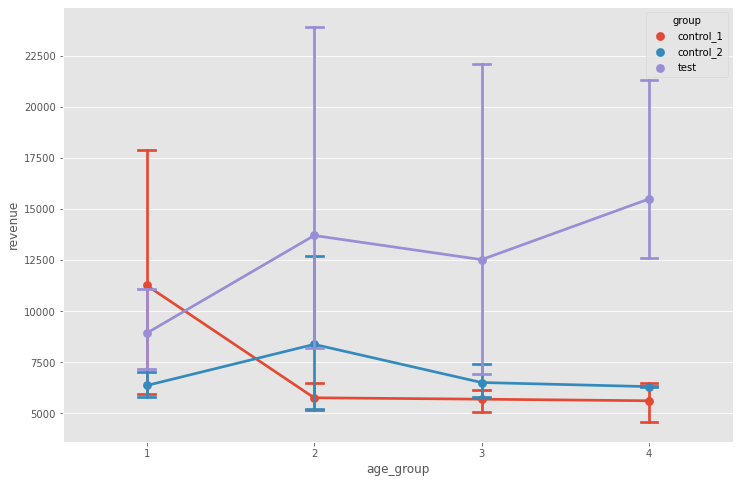

In [163]:
# простроим график враимосвязи факторов
plt.figure(figsize=(12,8))
sns.pointplot(x='age_group', y='revenue', data=all_transactions, hue='group', capsize= .1)

In [ ]:
#  как видно из графика хотя средние величины в тестовой группе и выше
# но доверительные интервалы достаочно широкие и в некоторых случаях пересекаются
# поэтому проверим стат значимость этих изменений

In [164]:
print(mannwhitneyu(all_transactions.query('group == "test" &  age_group == "1"').revenue, 
             all_transactions.query('group == "control_1" & age_group == "1"').revenue))
print(mannwhitneyu(all_transactions.query('group == "test" &  age_group == "1"').revenue, 
             all_transactions.query('group == "control_2" & age_group == "1"').revenue))

MannwhitneyuResult(statistic=156.0, pvalue=0.015558004784218817)
MannwhitneyuResult(statistic=163.5, pvalue=0.01157082354410298)


In [165]:
print(mannwhitneyu(all_transactions.query('group == "test" &  age_group == "2"').revenue, 
             all_transactions.query('group == "control_1" & age_group == "2"').revenue))
print(mannwhitneyu(all_transactions.query('group == "test" &  age_group == "2"').revenue, 
             all_transactions.query('group == "control_2" & age_group == "2"').revenue))

MannwhitneyuResult(statistic=184.5, pvalue=1.7815818754640425e-05)
MannwhitneyuResult(statistic=211.5, pvalue=2.315689623203144e-05)


In [166]:
print(mannwhitneyu(all_transactions.query('group == "test" &  age_group == "3"').revenue, 
             all_transactions.query('group == "control_1" & age_group == "3"').revenue))
print(mannwhitneyu(all_transactions.query('group == "test" &  age_group == "3"').revenue, 
             all_transactions.query('group == "control_2" & age_group == "3"').revenue))

MannwhitneyuResult(statistic=141.5, pvalue=0.00869938699701136)
MannwhitneyuResult(statistic=187.0, pvalue=0.06596215064248918)


In [167]:
print(mannwhitneyu(all_transactions.query('group == "test" &  age_group == "4"').revenue, 
             all_transactions.query('group == "control_1" & age_group == "4"').revenue))
print(mannwhitneyu(all_transactions.query('group == "test" &  age_group == "4"').revenue, 
             all_transactions.query('group == "control_2" & age_group == "4"').revenue))

MannwhitneyuResult(statistic=0.0, pvalue=0.0103187791219861)
MannwhitneyuResult(statistic=0.0, pvalue=0.020793170616093072)


In [ ]:
# как видно из тестов для 1, 2 и 4 возрастных групп подстверждается статистическая значимость изменений в тесте
# для 3 группы стат значимость в сравнении со 2 контрольной группой не подстверждается
# таким образом, если мы будем применять результаты теста на всю нашу аудитори
# мы должны особенно внимательно следить за группой молодежи до 25 лет, так как среднее значение для нее снизилось

In [ ]:
# дополнительно, для оценки наших рисков, проведем анализ retention, чтобы оценить отток пользователей в тесте и контроле

In [ ]:
# определим функцию, которая будет считать retention на основании даты регистрации и информации о днях посещения

In [170]:
def retetion_table(users_df, transactions_df):
    activity = users_df[['uid','visit_days']]\
                        .merge(transactions_df.drop_duplicates(subset=['uid'])[['uid', 'joined_at']]
                               , how='left', on='uid')\
                        .dropna(subset=['visit_days', 'joined_at'])
    activity['joined_at'] = pd.to_datetime(activity.joined_at.dt.strftime('%Y-%m-%d'))
    activity['visit_days'] = activity.visit_days.str.split(',')
    transform = pd.DataFrame(columns=['uid','joined_at','visit_day'])
    for row in activity.itertuples():
        days = row.visit_days
        for num_day in days:
            visit_day = row.joined_at + timedelta(days=int(num_day))
            new_row = pd.DataFrame({'uid':row.uid, 'joined_at':row.joined_at, 'visit_day':visit_day}, index=[1])
            transform = pd.concat([transform, new_row])
    transform['visit_month'] = pd.to_datetime(transform.visit_day.dt.strftime('%Y-%m'))
    transform['joined_at'] = pd.to_datetime(transform.joined_at.dt.strftime('%Y-%m'))
    transform['month_retention'] = transform.visit_month.dt.month - transform.joined_at.dt.month
    table_retention = (transform.groupby(['joined_at', 'month_retention'], as_index = False)
                   .agg({'uid': 'nunique'})
                   .pivot(index='joined_at', columns='month_retention', values='uid'))
    table_retention = table_retention.div(table_retention.loc[:,0], axis=0)
    ur_style = (table_retention
            .style
            .set_caption('User retention by cohort')
            .highlight_null('white')
            .format("{:.2%}", na_rep=""))
    return ur_style

In [171]:
retetion_table(users_test, transactions_test)

month_retention,0,1,2
joined_at,,,
2017-01-01 00:00:00,100.00%,,
2017-02-01 00:00:00,100.00%,,
2017-03-01 00:00:00,100.00%,,
2017-04-01 00:00:00,100.00%,,
2017-05-01 00:00:00,100.00%,,
2017-06-01 00:00:00,100.00%,,
2017-07-01 00:00:00,100.00%,,
2017-08-01 00:00:00,100.00%,,
2017-10-01 00:00:00,100.00%,73.68%,2.63%


In [172]:
retetion_table(users_control_1, transactions_control_1)

month_retention,0,1,2
joined_at,,,
2017-01-01 00:00:00,100.00%,,
2017-02-01 00:00:00,100.00%,,
2017-03-01 00:00:00,100.00%,,
2017-04-01 00:00:00,100.00%,,
2017-05-01 00:00:00,100.00%,,
2017-06-01 00:00:00,100.00%,,
2017-07-01 00:00:00,100.00%,,
2017-08-01 00:00:00,100.00%,,
2017-09-01 00:00:00,100.00%,,


In [173]:
retetion_table(users_control_2, transactions_control_2)

month_retention,0,1,2
joined_at,,,
2017-01-01 00:00:00,100.00%,,
2017-02-01 00:00:00,100.00%,,
2017-03-01 00:00:00,100.00%,,
2017-04-01 00:00:00,100.00%,,
2017-05-01 00:00:00,100.00%,,
2017-06-01 00:00:00,100.00%,,
2017-07-01 00:00:00,100.00%,,
2017-08-01 00:00:00,100.00%,,
2017-09-01 00:00:00,100.00%,,


In [ ]:
# как видно ни в одной из групп удержание до октября не привышает одного месяца
# это можно обьяснить либо тем, что мы собирали данные только об активности в первый месяц
# либо тем, что в наших данных была поломка
# следует отдельно исследовать эту ситуацию

In [ ]:
# так как не возможно сделать адекватных выводов на основании информации о посещении приложения
# попробуем определить ретеншен на основании и регистрации и частоты покупок

In [174]:
def retetion_table_by_transactions(transactions_df):
    activity = transactions_df[['uid', 'joined_at', 'paid_at']]
    activity['joined_at'] = pd.to_datetime(activity.joined_at.dt.strftime('%Y-%m')).copy()
    activity['paid_at'] = pd.to_datetime(activity.paid_at.dt.strftime('%Y-%m'))
    activity['month_retention'] = activity.paid_at.dt.month - activity.joined_at.dt.month
    table_retention = activity.groupby(['joined_at', 'month_retention'], as_index = False)\
                    .agg({'uid': 'nunique'})\
                    .pivot(index='joined_at', columns='month_retention', values='uid')
    table_retention = table_retention.div(table_retention.loc[:,0], axis=0)
    ur_style = (table_retention
            .style
            .set_caption('User retention by cohort')
            .highlight_null('white')
            .format("{:.2%}", na_rep=""))
    return ur_style

In [175]:
retetion_table_by_transactions(transactions_test)

<ipython-input-174-55d0d70e39ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['joined_at'] = pd.to_datetime(activity.joined_at.dt.strftime('%Y-%m')).copy()
<ipython-input-174-55d0d70e39ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['paid_at'] = pd.to_datetime(activity.paid_at.dt.strftime('%Y-%m'))
<ipython-input-174-55d0d70e39ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



month_retention,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10
joined_at,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,,,,,,,,,,,,,,,,,,,,
2017-02-01 00:00:00,,,,,,,,,,100.00%,50.00%,,100.00%,,,,,,100.00%,50.00%
2017-03-01 00:00:00,,,,,,,,,,100.00%,50.00%,,,,,,50.00%,50.00%,,
2017-04-01 00:00:00,,,,,,,,,,100.00%,25.00%,,,,,,50.00%,,,
2017-05-01 00:00:00,,,,,,,,,,100.00%,20.00%,40.00%,,20.00%,20.00%,60.00%,80.00%,,,
2017-06-01 00:00:00,,,,,,,,,,100.00%,200.00%,,,,400.00%,,,,,
2017-07-01 00:00:00,,,,,,,,,,100.00%,,,,600.00%,,,,,,
2017-08-01 00:00:00,,,,,,,,,,100.00%,300.00%,200.00%,200.00%,,,,,,,
2017-10-01 00:00:00,5.06%,6.33%,10.13%,8.86%,5.06%,5.06%,2.53%,3.80%,5.06%,100.00%,7.59%,3.80%,,,,,,,,


In [176]:
retetion_table_by_transactions(transactions_control_1)

<ipython-input-174-55d0d70e39ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['joined_at'] = pd.to_datetime(activity.joined_at.dt.strftime('%Y-%m')).copy()
<ipython-input-174-55d0d70e39ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['paid_at'] = pd.to_datetime(activity.paid_at.dt.strftime('%Y-%m'))
<ipython-input-174-55d0d70e39ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



month_retention,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,10
joined_at,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,,,,,,,,,,100.00%,,,33.33%,33.33%,,,66.67%,33.33%,33.33%
2017-02-01 00:00:00,,,,,,,,,,100.00%,50.00%,100.00%,50.00%,,50.00%,,50.00%,,
2017-03-01 00:00:00,,,,,,,,,,100.00%,300.00%,100.00%,,,,,200.00%,200.00%,
2017-04-01 00:00:00,,,,,,,,,,100.00%,33.33%,,,,,,33.33%,33.33%,
2017-05-01 00:00:00,,,,,,,,,,100.00%,80.00%,40.00%,,,40.00%,20.00%,160.00%,,
2017-06-01 00:00:00,,,,,,,,,,100.00%,16.67%,66.67%,50.00%,33.33%,100.00%,,,,
2017-07-01 00:00:00,,,,,,,,,,100.00%,,,100.00%,50.00%,,,,,
2017-08-01 00:00:00,,,,,,,,,,100.00%,,100.00%,200.00%,,,,,,
2017-09-01 00:00:00,,,,,,,,,,100.00%,200.00%,100.00%,,,,,,,


In [177]:
retetion_table_by_transactions(transactions_control_2)

<ipython-input-174-55d0d70e39ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['joined_at'] = pd.to_datetime(activity.joined_at.dt.strftime('%Y-%m')).copy()
<ipython-input-174-55d0d70e39ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity['paid_at'] = pd.to_datetime(activity.paid_at.dt.strftime('%Y-%m'))
<ipython-input-174-55d0d70e39ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



month_retention,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7
joined_at,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,,,,,,,,,,,,,,,,,
2017-02-01 00:00:00,,,,,,,,,,100.00%,,,100.00%,,,100.00%,400.00%
2017-03-01 00:00:00,,,,,,,,,,100.00%,50.00%,50.00%,,50.00%,,,100.00%
2017-04-01 00:00:00,,,,,,,,,,100.00%,,,,,,,
2017-05-01 00:00:00,,,,,,,,,,100.00%,100.00%,,,25.00%,,75.00%,50.00%
2017-06-01 00:00:00,,,,,,,,,,100.00%,75.00%,25.00%,50.00%,25.00%,25.00%,,
2017-07-01 00:00:00,,,,,,,,,,100.00%,33.33%,33.33%,,33.33%,,,
2017-08-01 00:00:00,,,,,,,,,,100.00%,,,33.33%,,,,
2017-09-01 00:00:00,,,,,,,,,,,,,,,,,


In [ ]:
# как видно из полученных данных у нас есть поломка
# для части пользователей дата регистрации указана позже чем дата покупки
# попробуем разобраться в чем причина

In [178]:
transactions_test.query('joined_at > paid_at').shape[0]

46

In [179]:
id_test_bug = transactions_test.query('joined_at > paid_at').uid.unique().tolist()

In [180]:
transactions_test.query('uid in @id_test_bug')\
                 .groupby('uid').agg({'joined_at': 'min', 'paid_at': 'min'})\
                 .sort_values('uid')

,joined_at,paid_at
uid,,
891572565,2017-10-31 20:40:00,2017-05-11 13:32:00
891589239,2017-10-31 14:16:00,2017-02-11 11:45:00
891600819,2017-10-31 08:41:00,2017-03-11 15:17:00
891603810,2017-10-31 06:36:00,2017-04-11 09:25:00
891640689,2017-10-30 13:47:00,2017-06-11 17:31:00
891651711,2017-10-30 07:50:00,2017-09-11 19:12:00
891654012,2017-10-30 06:05:00,2017-06-11 08:08:00
891654090,2017-10-30 05:59:00,2017-07-11 07:38:00
891700323,2017-10-29 13:19:00,2017-05-11 15:20:00


In [ ]:
# как видно все пользователи, у которых ошибочно указана дата регистрации
# совершили первую покупку 11 числа разных месяцев
# проверим верно ли, что у всех пользоветелей, которые совершили покупку 11 числа неверно указаны даты регистрации

In [181]:
id_fist_pay_11 = transactions_test.groupby('uid')\
                 .agg({'paid_at': 'min'})\
                 .paid_at.dt.day.reset_index()\
                 .query('paid_at == 11').uid.to_list()

In [182]:
is_fist_pay_11_not_bug = np.setdiff1d(id_fist_pay_11, id_test_bug)

In [183]:
transactions_test.query('uid in @is_fist_pay_11_not_bug')\
                 .groupby('uid').agg({'joined_at': 'min', 'paid_at': 'min'})\
                 .sort_values('paid_at')

,joined_at,paid_at
uid,,
891545874,2017-01-11 12:50:00,2017-02-11 13:43:00
891499359,2017-02-11 14:25:00,2017-02-11 14:30:00
891531897,2017-01-11 19:07:00,2017-02-11 16:37:00
891508155,2017-02-11 09:46:00,2017-02-11 17:34:00
891448377,2017-03-11 16:33:00,2017-03-11 16:46:00
891447105,2017-03-11 17:05:00,2017-03-11 17:18:00
891426960,2017-04-11 00:36:00,2017-04-11 00:51:00
891414915,2017-04-11 09:06:00,2017-04-11 09:56:00
891406224,2017-04-11 12:56:00,2017-04-11 13:35:00


In [ ]:
# как видно наше предположение не оправдалось
# необходимо дополнительно исследовать причину поломки даты регистрации

In [ ]:
# так как определение когорт на основании даты регистрации невозможно
# определим функию, которая будет считать retention на основании даты первой покупки

In [184]:
def retetion_table_by_transactions_v2(transactions_df):
    activity = transactions_df[['uid', 'paid_at']]
    activity = transactions_df.merge(transactions_df.groupby('uid', as_index=False)
                                                    .agg({'paid_at': 'min'})
                                                    .rename(columns={'paid_at':'fist_pay'}),
                                    how='left', on='uid')
    activity['fist_pay'] = pd.to_datetime(activity.fist_pay.dt.strftime('%Y-%m'))
    activity['paid_at'] = pd.to_datetime(activity.paid_at.dt.strftime('%Y-%m'))
    activity['month_retention'] = activity.paid_at.dt.month - activity.fist_pay.dt.month
    table_retention = activity.groupby(['fist_pay', 'month_retention'], as_index = False)\
                    .agg({'uid': 'nunique'})\
                    .pivot(index='fist_pay', columns='month_retention', values='uid')
    table_retention = table_retention.div(table_retention.loc[:,0], axis=0)
    ur_style = (table_retention
            .style
            .set_caption('User retention by cohort')
            .highlight_null('white')
            .format("{:.2%}", na_rep=""))
    return ur_style

In [185]:
retetion_table_by_transactions_v2(transactions_test)

month_retention,0,1,2,3,4,5,6,7,8,9,11
fist_pay,,,,,,,,,,,
2017-01-01 00:00:00,100.00%,,,,,,,,25.00%,75.00%,25.00%
2017-02-01 00:00:00,100.00%,11.11%,11.11%,11.11%,,,,11.11%,22.22%,11.11%,
2017-03-01 00:00:00,100.00%,10.00%,10.00%,,10.00%,10.00%,,30.00%,10.00%,,
2017-04-01 00:00:00,100.00%,10.00%,,,,,30.00%,10.00%,,,
2017-05-01 00:00:00,100.00%,11.11%,22.22%,,,11.11%,11.11%,11.11%,,,
2017-06-01 00:00:00,100.00%,,,,20.00%,,,,,,
2017-07-01 00:00:00,100.00%,,,25.00%,25.00%,,,,,,
2017-08-01 00:00:00,100.00%,50.00%,75.00%,50.00%,25.00%,,,,,,
2017-09-01 00:00:00,100.00%,,25.00%,,,,,,,,


In [186]:
transactions_control = pd.concat([transactions_control_1, transactions_control_2])

In [187]:
retetion_table_by_transactions_v2(transactions_control)

month_retention,0,1,2,3,4,5,6,7,8,9,11
fist_pay,,,,,,,,,,,
2017-01-01 00:00:00,100.00%,,8.33%,8.33%,,8.33%,8.33%,8.33%,,25.00%,16.67%
2017-02-01 00:00:00,100.00%,,6.25%,,,,,,31.25%,6.25%,
2017-03-01 00:00:00,100.00%,41.67%,16.67%,8.33%,8.33%,8.33%,,25.00%,8.33%,8.33%,
2017-04-01 00:00:00,100.00%,,5.56%,,,,11.11%,5.56%,,,
2017-05-01 00:00:00,100.00%,7.41%,3.70%,3.70%,3.70%,7.41%,11.11%,7.41%,,,
2017-06-01 00:00:00,100.00%,7.14%,7.14%,3.57%,14.29%,,,,,,
2017-07-01 00:00:00,100.00%,6.67%,6.67%,6.67%,,,,,,,
2017-08-01 00:00:00,100.00%,20.00%,,,6.67%,,,,,,
2017-09-01 00:00:00,100.00%,28.57%,14.29%,,,,,,,,


In [ ]:
#  как видно из сравнения данных о тестовой группе и о контрольных, в тестовой группе не наблюдается существенного оттока.
#  что ещё раз подтвержает, то что эксперемент можно считать удачнымюё

# Выводы

На основании проведенных тестов можно сделать вывод, что наш эксперимент был в целом удачным. Значения ARPU и величина медианного чека выросли по отношению к обоим контрольным группа.
Доля платежей продукта "premium_no_trial" статистически не изменилась, то есть пользователи не стали чаще подписываться на premium.
Стоит обратить внимание, что величина повторных покупок тарифа premium в тестовой группе возросла. В сравнении с первой контрольной группой это изменение нельзя считать статистически значимым, а в сранение со второй можно.
Сравнение анализа retention в тестовой и контрольной группе не показывает снижения удержания пользователей в тестовой группе.
Анализ эффективности эксперимента в различных регионах нельзя однонозначно интерпретировать из-за маленькой величины выборок. Статистически значимы изменения в Европе и Северной Америкею
Анализ эффективности эксперимента в различных возростных группах подствержден почти для всех групп. Для группы от 35 до 50 не подтверждена стат значимость со второй контрольной группой. Также если будет принято решение применить изменения на всю аудиторию, нужно обратить отдельное внимание на группу молодежи до 25 лет, так как средние значения для неё снизилось, а медианное возросло.


# Замечания

В данных обнаружено несколько существенных проблем:
1. Существенный дисбаланс по половому признаку. Доля gender = 1 составляет более 95%
2. В данных об активности пользователей отсутсвует информация о посещениях свыше месяца
3. Для части пользователей совершивших оплату 11 числа любого месяца дата регистрации отображена неверно.